## Continuing with PCA and Data Visualization

#### Open a Jupyter Notebook to follow along

### Loading Our Data

This time in particular I want to set up our analysis to be as modular as possible so I'm going to focus on putting things into nice boxes and using the import function.

In [1]:
### Loading all of our modules at once
# Data storage methods and analysis toolkits
import pandas as pd
import numpy as np
import scipy

# Graphing
import matplotlib as mpl
import matplotlib.pyplot as plt

# Functions for the PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
### Loading our data, Template

df = pd.read_csv(input(), sep="\t")  #Loading the data as a data frame
print(df) ### Optionally here for debugging.

 ~/env3040_2025/File_Share/Concrete_Data.txt


      Cement (component 1)(kg in a m^3 mixture)  \
0                                         540.0   
1                                         540.0   
2                                         332.5   
3                                         332.5   
4                                         198.6   
...                                         ...   
1025                                      276.4   
1026                                      322.2   
1027                                      148.5   
1028                                      159.1   
1029                                      260.9   

      Blast Furnace Slag (component 2)(kg in a m^3 mixture)  \
0                                                   0.0       
1                                                   0.0       
2                                                 142.5       
3                                                 142.5       
4                                                 132.4       
...      

## Today's dataset

#### Concrete Compressive Strength by I. Yeh, 1998.

#### https://archive.ics.uci.edu/dataset/165/concrete+compressive+strength
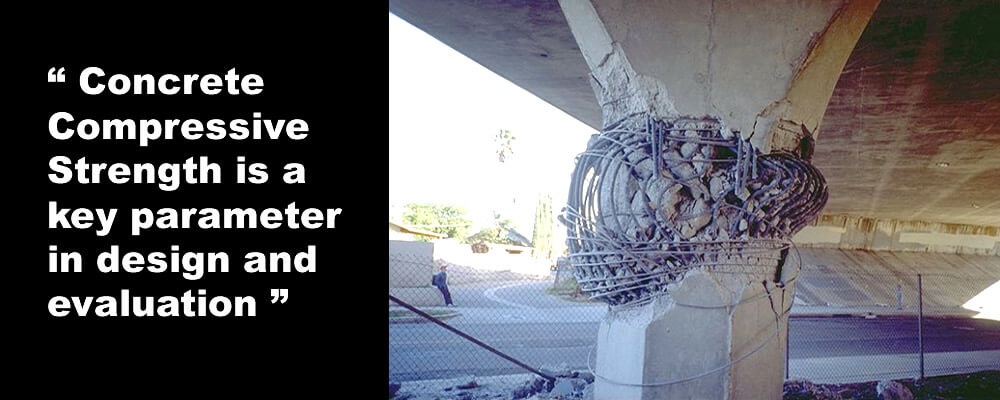

Measured 8 inputs:
Cement (kg in a m^3 mixture)
Blast Furnace Slag (kg in a m^3 mixture)
Fly Ash (kg in a m^3 mixture)
Water (kg in a m^3 mixture)
Superplasticiser (kg in a m^3 mixture)
Coarse Aggregate (kg in a m^3 mixture)
Fine Aggregate (kg in a m^3 mixture)
Age (days)
Concrete Compressive Strength (MPa)


## Let's Explore Our Data

#### Distributions of the Data
First I want to see what the overall layout of the data looks like. Let's start with summary statistics.

##### We can look them up here for more! https://pandas.pydata.org/pandas-docs/stable/reference/frame.html

In [3]:
df.mean(axis=0)

Cement (component 1)(kg in a m^3 mixture)                281.167864
Blast Furnace Slag (component 2)(kg in a m^3 mixture)     73.895825
Fly Ash (component 3)(kg in a m^3 mixture)                54.188350
Water  (component 4)(kg in a m^3 mixture)                181.567282
Superplasticizer (component 5)(kg in a m^3 mixture)        6.204660
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     972.918932
Fine Aggregate (component 7)(kg in a m^3 mixture)        773.580485
Age (day)                                                 45.662136
Concrete compressive strength(MPa, megapascals)           35.817961
dtype: float64

In [4]:
df.median(axis=0)

Cement (component 1)(kg in a m^3 mixture)                272.900
Blast Furnace Slag (component 2)(kg in a m^3 mixture)     22.000
Fly Ash (component 3)(kg in a m^3 mixture)                 0.000
Water  (component 4)(kg in a m^3 mixture)                185.000
Superplasticizer (component 5)(kg in a m^3 mixture)        6.400
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     968.000
Fine Aggregate (component 7)(kg in a m^3 mixture)        779.500
Age (day)                                                 28.000
Concrete compressive strength(MPa, megapascals)           34.445
dtype: float64

In [5]:
df.std(axis=0)

Cement (component 1)(kg in a m^3 mixture)                104.506364
Blast Furnace Slag (component 2)(kg in a m^3 mixture)     86.279342
Fly Ash (component 3)(kg in a m^3 mixture)                63.997004
Water  (component 4)(kg in a m^3 mixture)                 21.354219
Superplasticizer (component 5)(kg in a m^3 mixture)        5.973841
Coarse Aggregate  (component 6)(kg in a m^3 mixture)      77.753954
Fine Aggregate (component 7)(kg in a m^3 mixture)         80.175980
Age (day)                                                 63.169912
Concrete compressive strength(MPa, megapascals)           16.705742
dtype: float64

In [6]:
df.mean(axis=0)/df.std(axis=0)

Cement (component 1)(kg in a m^3 mixture)                 2.690438
Blast Furnace Slag (component 2)(kg in a m^3 mixture)     0.856472
Fly Ash (component 3)(kg in a m^3 mixture)                0.846733
Water  (component 4)(kg in a m^3 mixture)                 8.502642
Superplasticizer (component 5)(kg in a m^3 mixture)       1.038638
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     12.512790
Fine Aggregate (component 7)(kg in a m^3 mixture)         9.648532
Age (day)                                                 0.722846
Concrete compressive strength(MPa, megapascals)           2.144051
dtype: float64

In [7]:
df.sort_values(by=['Concrete compressive strength(MPa, megapascals) '], ascending=False)

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
181,389.9,189.0,0.0,145.9,22.0,944.7,755.8,91,82.60
381,315.0,137.0,0.0,145.0,5.9,1130.0,745.0,28,81.75
153,323.7,282.8,0.0,183.8,10.3,942.7,659.9,56,80.20
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
159,389.9,189.0,0.0,145.9,22.0,944.7,755.8,56,79.40
...,...,...,...,...,...,...,...,...,...
717,141.3,212.0,0.0,203.5,0.0,971.8,748.5,3,4.83
668,153.0,102.0,0.0,192.0,0.0,888.0,943.1,3,4.78
652,102.0,153.0,0.0,192.0,0.0,887.0,942.0,3,4.57
705,122.6,183.9,0.0,203.5,0.0,958.2,800.1,3,3.32


In [8]:
df.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

## Comparing two variables

Now that we have some basic information on our dataset we can move on to anayses that compare between two variables.

In this case we have 8 independent variables and 1 clear dependent variable. So we want to start by testing whether each independent variable (in isolation) impacts strength.

#### We can start with a scatterplot

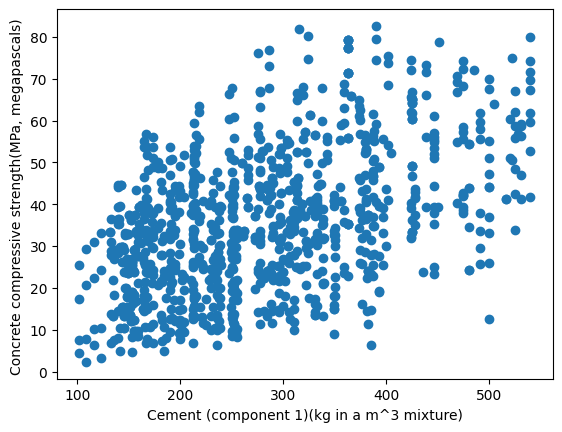

In [9]:
fig,ax = plt.subplots()
ax.set_xlabel('Cement (component 1)(kg in a m^3 mixture)')
ax.set_ylabel('Concrete compressive strength(MPa, megapascals) ')
plt.scatter(df['Cement (component 1)(kg in a m^3 mixture)'], df['Concrete compressive strength(MPa, megapascals) '])

Cement (component 1)(kg in a m^3 mixture)
Blast Furnace Slag (component 2)(kg in a m^3 mixture)
Fly Ash (component 3)(kg in a m^3 mixture)
Water  (component 4)(kg in a m^3 mixture)
Superplasticizer (component 5)(kg in a m^3 mixture)
Coarse Aggregate  (component 6)(kg in a m^3 mixture)
Fine Aggregate (component 7)(kg in a m^3 mixture)
Age (day)
Concrete compressive strength(MPa, megapascals) 


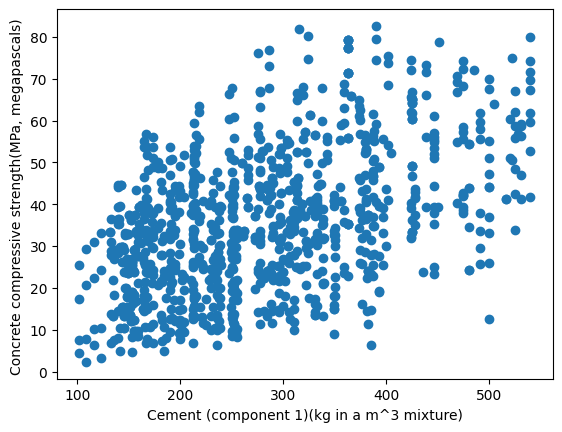

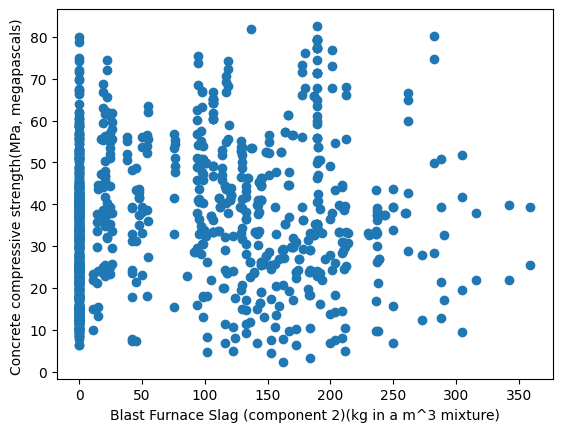

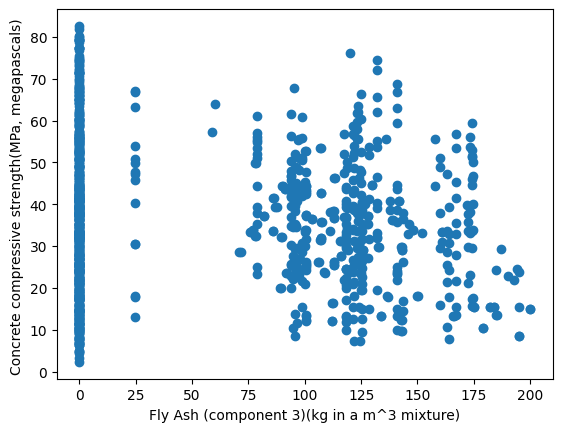

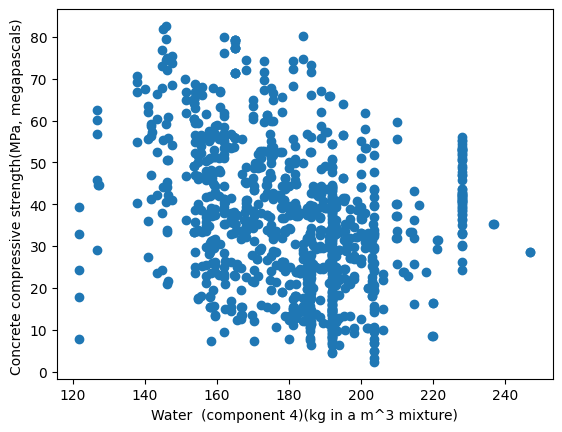

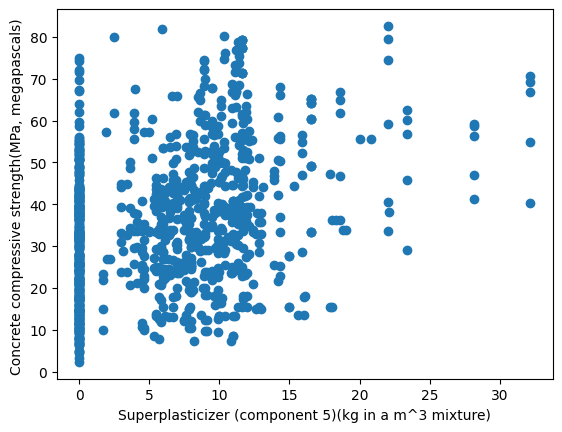

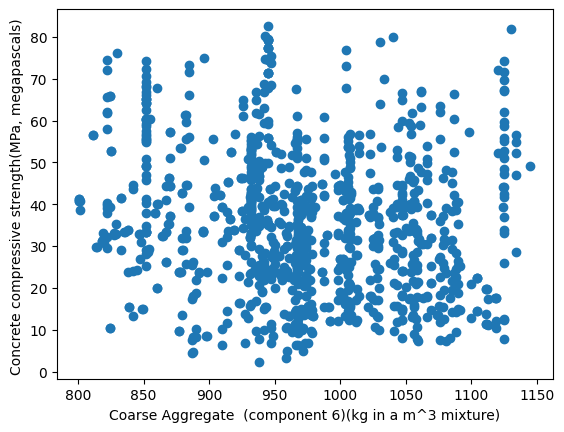

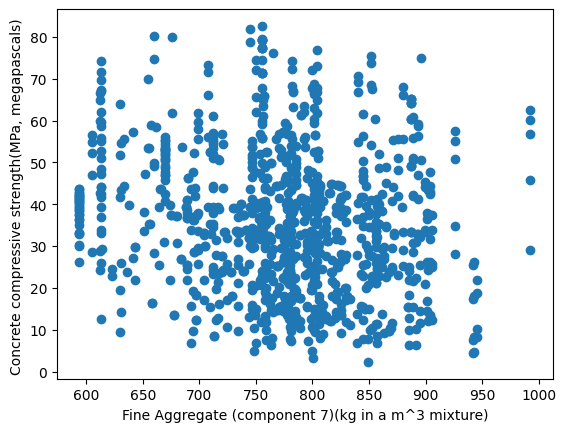

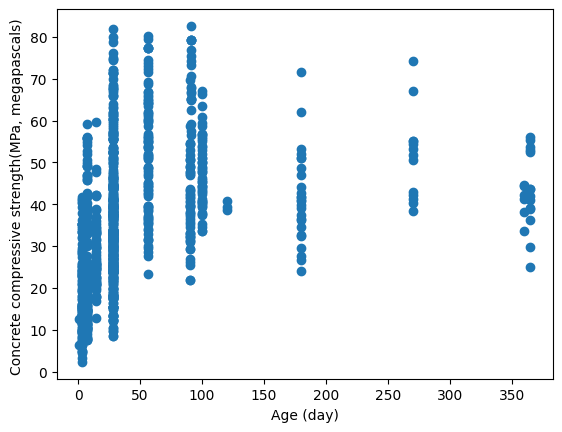

In [10]:
### Making a scatterplot using MatPlotLib

for i in df:  # i = column
    print(i)
    if i != "Concrete compressive strength(MPa, megapascals) ":
        fig,ax = plt.subplots()
        ax.set_xlabel(i)
        ax.set_ylabel("Concrete compressive strength(MPa, megapascals) ")
        plt.scatter(df[i], df['Concrete compressive strength(MPa, megapascals) '])
    
                     


## Linear Regression and Correlation

Given the size of this data and the continious nature of the data Pearson Correlation seems appropriate.


In [11]:
#### Regression

for i in df:    
    if i != "Concrete compressive strength(MPa, megapascals) ":
        linR=scipy.stats.linregress(df[i], df['Concrete compressive strength(MPa, megapascals) '])
        #print(linR)
        m=np.round(linR.slope, 3)
        b=np.round(linR.intercept, 3)
        r=np.round(linR.rvalue, 3)
        p=linR.pvalue
        print(i, "    Regression Line: y="+str(m)+"x+"+str(b), "; R="+str(r), "; p="+str(p))

### In CLASS: Find the most important feature.
        
        

Cement (component 1)(kg in a m^3 mixture)     Regression Line: y=0.08x+13.443 ; R=0.498 ; p=1.3241833072270048e-65
Blast Furnace Slag (component 2)(kg in a m^3 mixture)     Regression Line: y=0.026x+33.889 ; R=0.135 ; p=1.413567382517977e-05
Fly Ash (component 3)(kg in a m^3 mixture)     Regression Line: y=-0.028x+37.314 ; R=-0.106 ; p=0.0006751583555754655
Water  (component 4)(kg in a m^3 mixture)     Regression Line: y=-0.227x+76.958 ; R=-0.29 ; p=2.3506546475110196e-21
Superplasticizer (component 5)(kg in a m^3 mixture)     Regression Line: y=1.024x+29.466 ; R=0.366 ; p=5.131485052741784e-34
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     Regression Line: y=-0.035x+70.295 ; R=-0.165 ; p=1.0183513390865196e-07
Fine Aggregate (component 7)(kg in a m^3 mixture)     Regression Line: y=-0.035x+62.775 ; R=-0.167 ; p=6.704113568134071e-08
Age (day)     Regression Line: y=0.087x+31.847 ; R=0.329 ; p=2.1063405536321048e-27


## Interpreting Very Small P-values

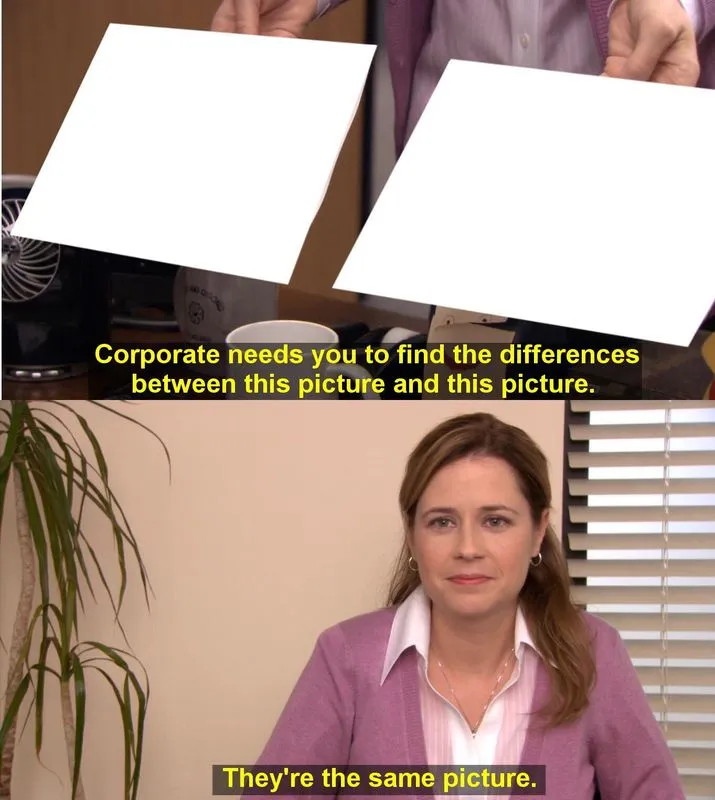




#### What to do instead
Use information that has not become saturated. R, R-squared values are the most useful in this particular case.

#### Why did this happen
Think about what the p-value is testing.

## Let's put our findings together.

LinregressResult(slope=0.07958033584687194, intercept=13.44252811239993, rvalue=0.4978319193241574, pvalue=1.3241833072270048e-65, stderr=0.0043239689271733816, intercept_stderr=1.296948113490991)
[102.0, 540.0] [21.559722368780868, 56.41590946971077]


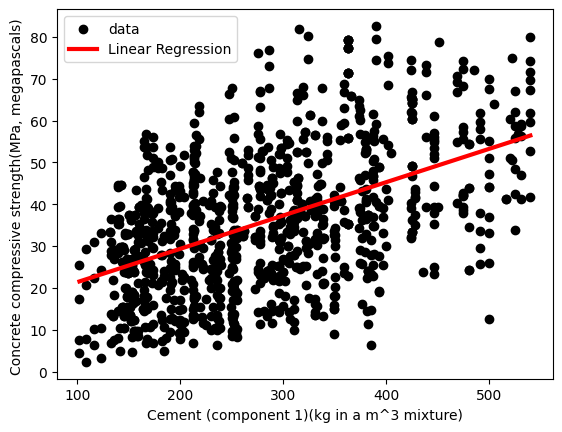

In [69]:
### Copy from the Scatterplot.
fig,ax = plt.subplots()
ax.set_xlabel("Cement (component 1)(kg in a m^3 mixture)")
ax.set_ylabel("Concrete compressive strength(MPa, megapascals) ")
plt.scatter(df['Cement (component 1)(kg in a m^3 mixture)'], df['Concrete compressive strength(MPa, megapascals) '], c='black')
### Copy from Regression
linR=scipy.stats.linregress(df['Cement (component 1)(kg in a m^3 mixture)'], df['Concrete compressive strength(MPa, megapascals) '])
print(linR)

### New Trick, plot equation
x=[0, 100]
y=[0, 100]
### IN CLASS Replace the x minimum and maximum with the scatter plot point ranges
#x=[TBD]

x[0]=df["Cement (component 1)(kg in a m^3 mixture)"].min()
y[0]=(linR.slope*x[0])+linR.intercept
x[1]=df["Cement (component 1)(kg in a m^3 mixture)"].max()
y[1]=(linR.slope*x[1])+linR.intercept
print(x, y)
###IN CLASS calculate Y


### IN CLASS Decorate...

plt.plot(x,y, lw=3, c="red")
ax.legend(["data", "Linear Regression"])

## Color Coding Our Data Points

Simplest Way: Layer multiple plots on top of each other where each set of data has a different value.
More Complex but more flexible way: Encode the colors you plan to use directly with the data and use the color sequences or colormaps.

### The Default Colors

You have probably noticed that if you don't specify a color you always get blue.
Next orange and so forth, much like Excel.

The default colors are known as the Tab10 set and follow a basic set of common relatively easy to distinguish colors.

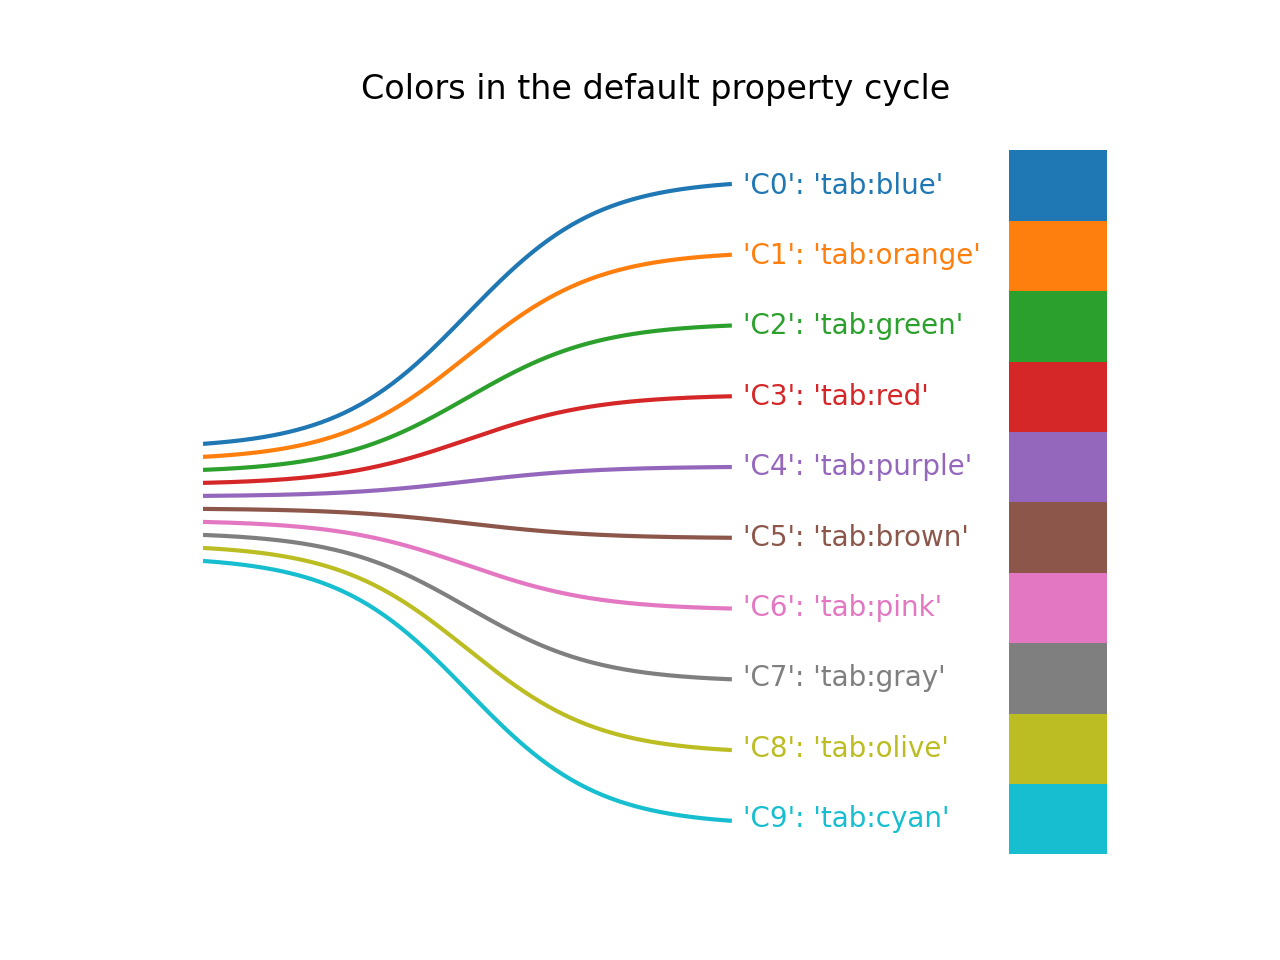

### Encoding Colors

- Just like the x and y values the color setting can recieve a list of values.  
- This list should be the same length as the other lists (otherwise you're missing assignments for some points).


### Alternative Color Sequences

- Color Sequences are preset lists of colors that come installed (just like Tab10). 
- They vary in design and intensity but are esthetic and do not contain obvious directionality.
- You can also create your own color sequences. 

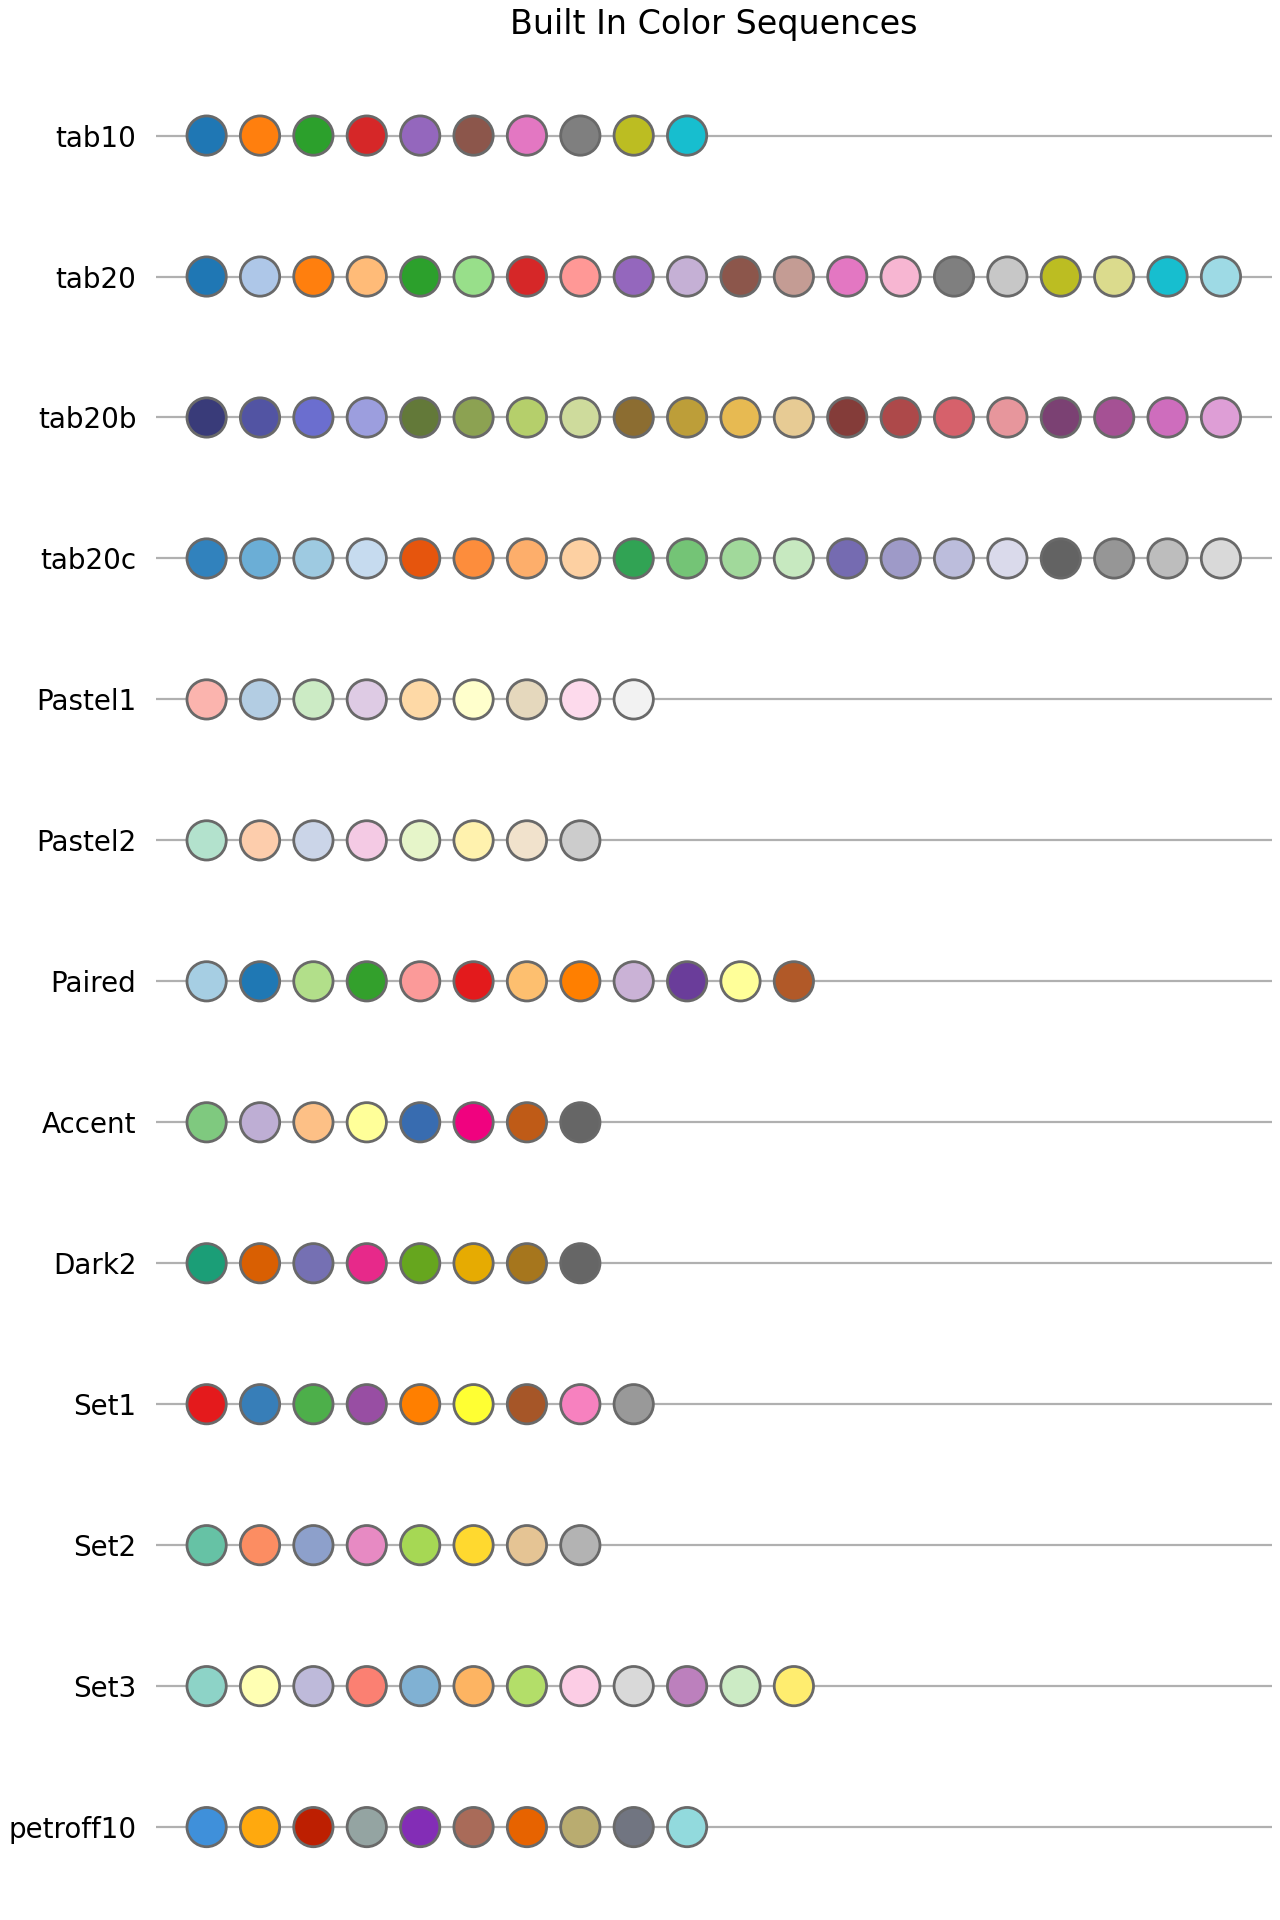

### Colormaps

Colormaps allow you to create harness an (apparently continious) specturm of colors.

This is very useful if you want to convey quantitative information through color.

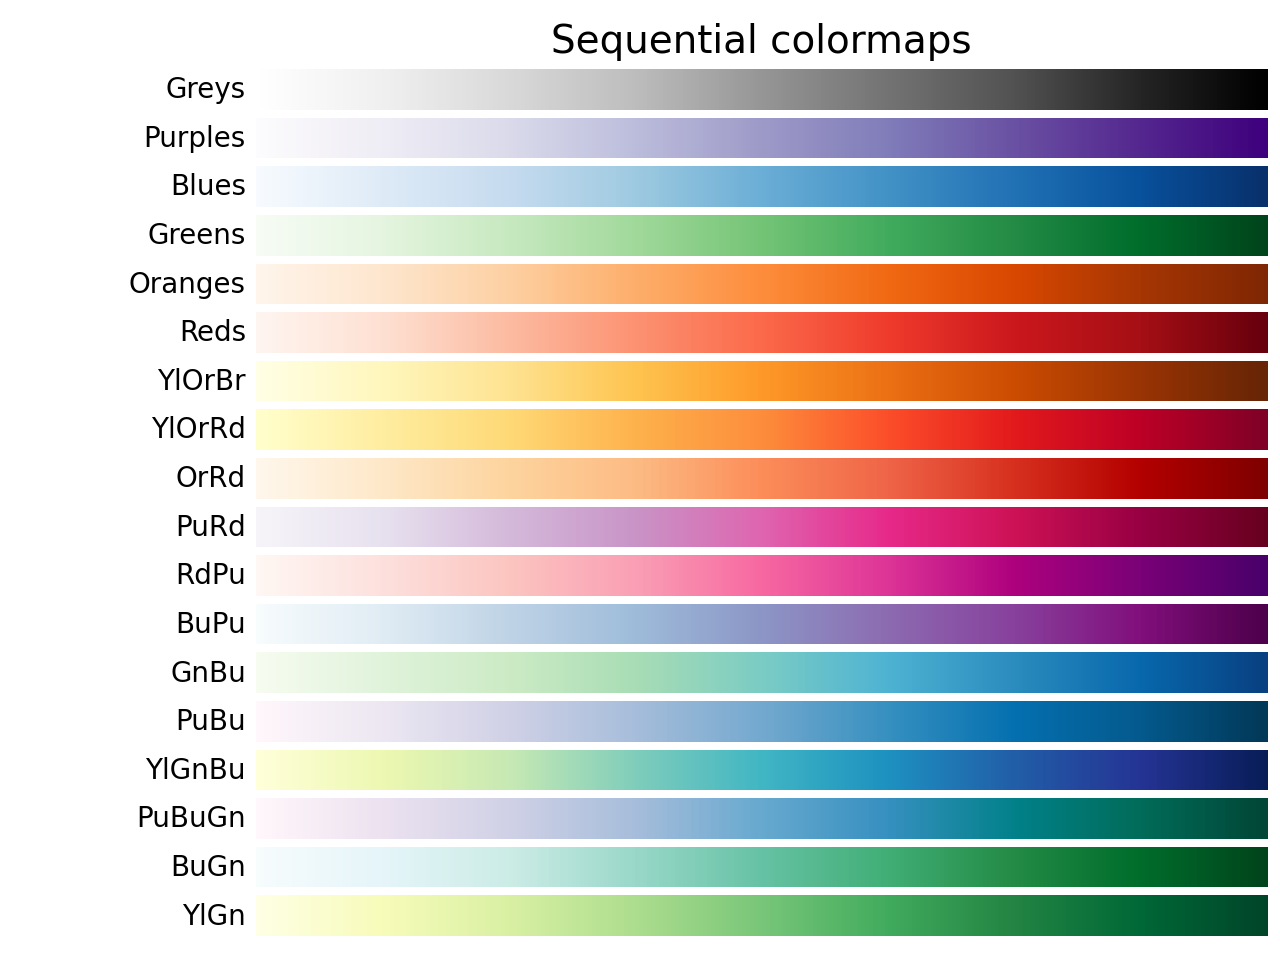


### Implementation and basic tips.

- First, set the color parameter to a list, them add the cmap= option
    - Failure to set cmap when you have a range of color values will default to the "viridis" color map
- If you set cmap to a color sequence eg. tab10 and there are more values than occur in the color list you will get discrete values subdivided linearly into 10 bins
    - Since these colors don't have an obvious relationship this is not a great solution
    - Use colormaps instead.
- Add a label with plt.colorbar()

LinregressResult(slope=0.07958033584687194, intercept=13.44252811239993, rvalue=0.4978319193241574, pvalue=1.3241833072270048e-65, stderr=0.0043239689271733816, intercept_stderr=1.296948113490991)
[102.0, 540.0] [21.559722368780868, 56.41590946971077]


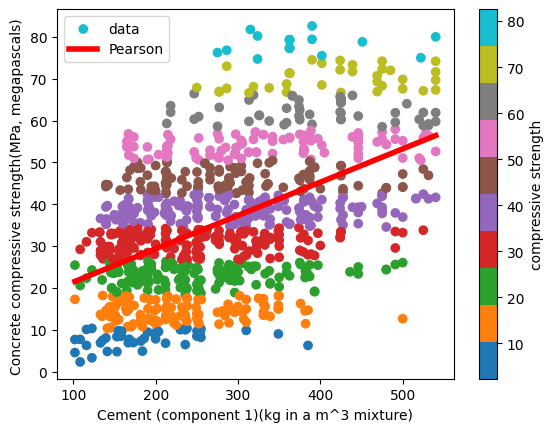

In [77]:
### Copy from the Scatterplot.
fig,ax = plt.subplots()
ax.set_xlabel("Cement (component 1)(kg in a m^3 mixture)")
ax.set_ylabel("Concrete compressive strength(MPa, megapascals) ")

### Copy from Regression
linR=scipy.stats.linregress(df['Cement (component 1)(kg in a m^3 mixture)'], df['Concrete compressive strength(MPa, megapascals) '])
print(linR)

### New Trick, plot equation
x=[0, 100]
y=[0, 100]
### IN CLASS Replace the x minimum and maximum with the scatter plot point ranges
#x=[TBD]

x[0]=df["Cement (component 1)(kg in a m^3 mixture)"].min()
y[0]=(linR.slope*x[0])+linR.intercept
x[1]=df["Cement (component 1)(kg in a m^3 mixture)"].max()
y[1]=(linR.slope*x[1])+linR.intercept
print(x, y)

### IN CLASS: Revise this to take a List
plt.scatter(df['Cement (component 1)(kg in a m^3 mixture)'], df['Concrete compressive strength(MPa, megapascals) '], c=df['Concrete compressive strength(MPa, megapascals) '], cmap='tab10')
plt.plot(x,y, lw=4, c="red")
plt.colorbar(label=("compressive strength"))
ax.legend(["data", "Pearson"])

## Filtering Data

There are lots of reasons why you would filter data. QC, Focused Questions, etc. 
It's the most important thing that you often do with your data.

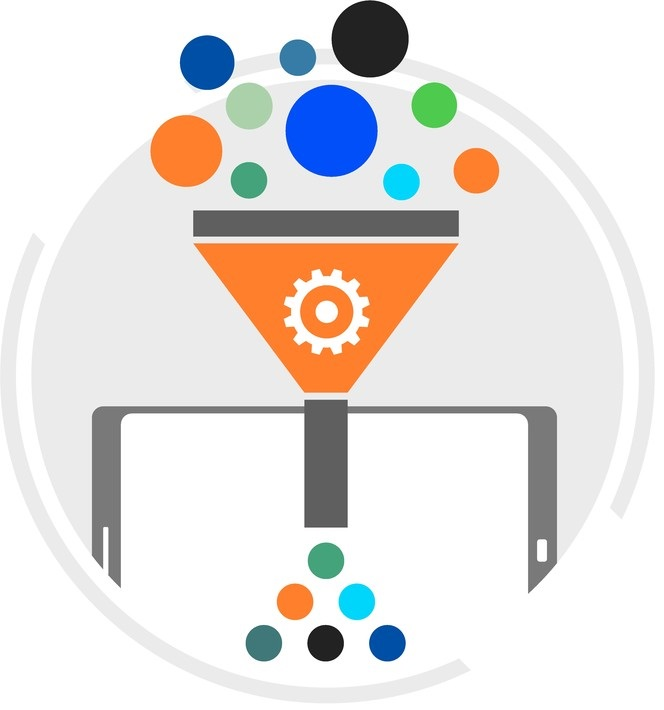

#### DO NOT DESTROY YOUR ORIGINAL DATA!!! EVER!!!

This doesn't mean you don't necessarily have to keep the original data in memory in a python script but do not, under any circumstances overwrite that original file. 

### Filtering data with Pandas

Dataframes are easy to filter using booleans. 
Convienently this is not done "in place" so the original dataframe remains intact.

filtered_df = df\[df['Age (days)'] > 60]

In [78]:
### IN CLASS let's remove concrete that is unlikely to be fully cured from our analysis.

### df exists and is the whole dataset

df_temp1 = df[df['Age (day)'] > 45] ## calling this temp1 because I'm going to modify it more.
df_f = df_temp1[df_temp1['Age (day)'] < 150] ## Make sure that you're calling the correct dataframe. we never overwrote df.

print(df_f)

     Cement (component 1)(kg in a m^3 mixture)  \
5                                        266.0   
10                                       198.6   
13                                       190.0   
15                                       380.0   
16                                       139.6   
..                                         ...   
790                                      349.0   
796                                      500.0   
805                                      393.0   
812                                      310.0   
819                                      525.0   

     Blast Furnace Slag (component 2)(kg in a m^3 mixture)  \
5                                                114.0       
10                                               132.4       
13                                               190.0       
15                                                 0.0       
16                                               209.4       
..                         

0.558 	 Cement (component 1)(kg in a m^3 mixture)
0.447 	 Blast Furnace Slag (component 2)(kg in a m^3 mixture)
-0.204 	 Fly Ash (component 3)(kg in a m^3 mixture)
-0.476 	 Water  (component 4)(kg in a m^3 mixture)
0.621 	 Superplasticizer (component 5)(kg in a m^3 mixture)
-0.286 	 Coarse Aggregate  (component 6)(kg in a m^3 mixture)
-0.182 	 Fine Aggregate (component 7)(kg in a m^3 mixture)
-0.135 	 Age (day)
[0.0, 32.2] [39.55942284795652, 83.79953091999957]


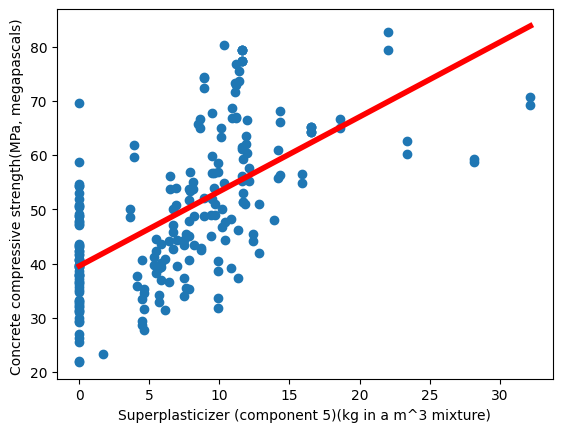

In [93]:
### Let's do regression on just this data.

### Pasted from above but we need to modify this to use the new filtered dataframe in some cases.


for i in df_f:    
    if i != "Concrete compressive strength(MPa, megapascals) ":
        linR=scipy.stats.linregress(df_f[i], df_f['Concrete compressive strength(MPa, megapascals) '])
        #print(linR)
        m=np.round(linR.slope, 3)
        b=np.round(linR.intercept, 3)
        r=np.round(linR.rvalue, 3)
        p=linR.pvalue
        print(r, "\t", i)
        #print(i, "    Regression Line: y="+str(m)+"x+"+str(b), "; R="+str(r), "; p="+str(p))
        
### Regression Line
col='Superplasticizer (component 5)(kg in a m^3 mixture)'  # Independent variable for graphing

linR=scipy.stats.linregress(df_f[col], df_f['Concrete compressive strength(MPa, megapascals) '])
x=[0, 100]
y=[0, 100]
x[0]=df_f[col].min()
y[0]=(linR.slope*x[0])+linR.intercept
x[1]=df_f[col].max()
y[1]=(linR.slope*x[1])+linR.intercept
print(x, y)


### Plotting data
fig,ax = plt.subplots()
ax.set_xlabel(col)
ax.set_ylabel('Concrete compressive strength(MPa, megapascals) ')
plt.scatter(df_f[col], df_f['Concrete compressive strength(MPa, megapascals) '])
plt.plot(x,y, lw=4, c="red")

[0.3267581  0.29909895 0.15004237 0.13614072 0.06494807 0.01931965]
33.0%


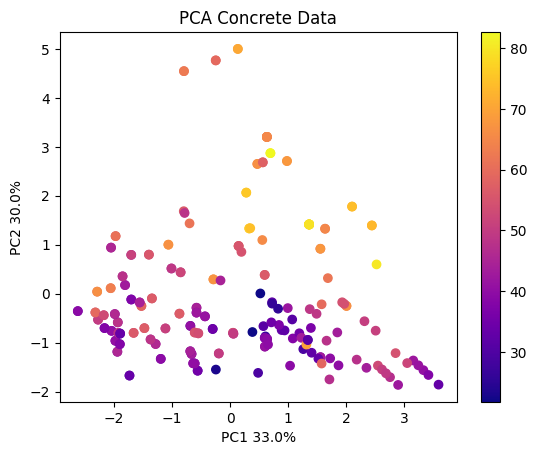

In [118]:
### Generating PCA

### Filter data first
tmp = df_f.drop('Concrete compressive strength(MPa, megapascals) ', axis=1)  # This removes the column specified.
dfclean = tmp.drop('Age (day)', axis=1)  # This removes the column specified.

### Rescaling our Data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(dfclean)

### Creating the PCA Analysis
pca = PCA(n_components=0.99) # To retain 99% of variance
PCs = pca.fit_transform(scaled_data)

### Possible Outputs
#print(PCs)
print(pca.explained_variance_ratio_)   # A list with how much each PC explains in decimals.
#print(pca.components_)
#print(dfclean = df.drop('Concrete compressive strength(MPa, megapascals) ', axis=1))
#print(dfclean)
pc1pct = str(np.round(pca.explained_variance_ratio_[0]*100))+"%"
print(pc1pct)
pc2pct = str(np.round(pca.explained_variance_ratio_[1]*100))+"%"
### Ploting the PCA

fig,ax = plt.subplots()
ax.set_xlabel("PC1 " + pc1pct)  ### IN CLASS: Improve this
ax.set_ylabel("PC2 " + pc2pct)

ax.set_title('PCA Concrete Data')
plt.scatter(PCs[:, 0], PCs[:, 1], c=df_f['Concrete compressive strength(MPa, megapascals) '], cmap="plasma")
plt.colorbar()

## What's wrong with this analysis?

[[ 0.67932574 -1.45785612  2.38762366 ...  0.39670012 -0.44296019
   0.78077327]
 [ 0.68664623 -1.57944147  2.35402299 ...  0.39031474 -0.3822471
   0.73699086]
 [ 4.15580307  0.36034146  0.36076737 ...  1.77379872  1.57127719
  -0.00442464]
 ...
 [-0.18489677  1.25313934 -1.47527546 ...  0.20813289 -0.38716939
   0.14220031]
 [-0.2836998   1.27428605 -0.63694264 ... -0.58814455  0.93581675
  -0.75527658]
 [ 0.09777275  1.25779798 -0.2454177  ...  0.46492675 -0.84527402
  -0.27093923]]
[0.28501242 0.17700935 0.16750988 0.12676986 0.1189385  0.09877443
 0.02223021]


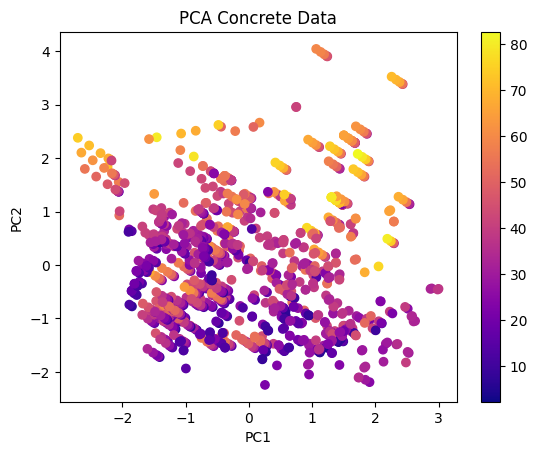

In [63]:
### Generating PCA

### Rescaling our Data

dfclean = df.drop('Concrete compressive strength(MPa, megapascals) ', axis=1)
#print(dfclean)
#print(df)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(dfclean)

### Creating the PCA Analysis
pca = PCA(n_components=0.99) # To retain 99% of variance
PCs = pca.fit_transform(scaled_data)

### Possible Outputs
print(PCs)
print(pca.explained_variance_ratio_)
#pca.components_

### Ploting the PCA

fig,ax = plt.subplots()
ax.set_xlabel("PC1")  ### IN CLASS: Improve this
ax.set_ylabel("PC2")

ax.set_title('PCA Concrete Data')
plt.scatter(PCs[:, 1], PCs[:, 2], c=df['Concrete compressive strength(MPa, megapascals) '], cmap="plasma")
plt.colorbar()